In [32]:
import numpy as np
import matplotlib.pyplot as plt

from Common import *

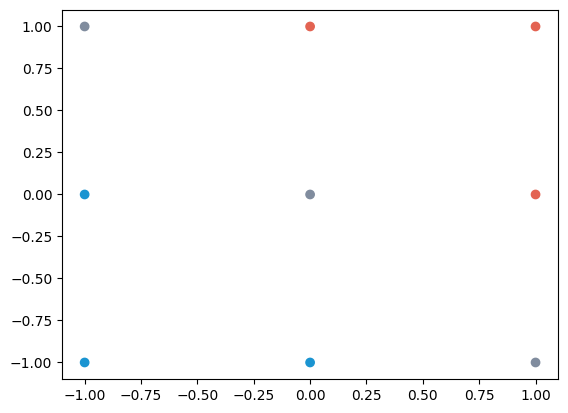

In [33]:
plt.scatter(input[:, 0], input[:, 1], c=expected, cmap=cmap)

In [388]:
W0 = np.array([[0.61275508, 0.98539237, 0.27266151],
               [-0.47399039, 0.66266751, -0.72721264]])
W1 = np.array([[0.96787958],
               [-0.80183257],
               [0.94478099]])

expected = expected.reshape(9, 1)

In [389]:
def run(i):
  x1 = np.matmul(i, W0)
  x2 = np.matmul(x1, W1)
  return (x2, x1)

In [610]:
x2, x1 = run(input)
loss = abs(expected - x2).sum()
loss

np.column_stack([x2, expected])

2.181252853841788

array([[-0.09062643,  0.        ],
       [ 0.60702676,  1.        ],
       [ 1.30467995,  1.        ],
       [-0.69765319, -1.        ],
       [ 0.        ,  0.        ],
       [ 0.69765319,  1.        ],
       [-1.30467995, -1.        ],
       [-0.60702676, -1.        ],
       [ 0.09062643,  0.        ]])

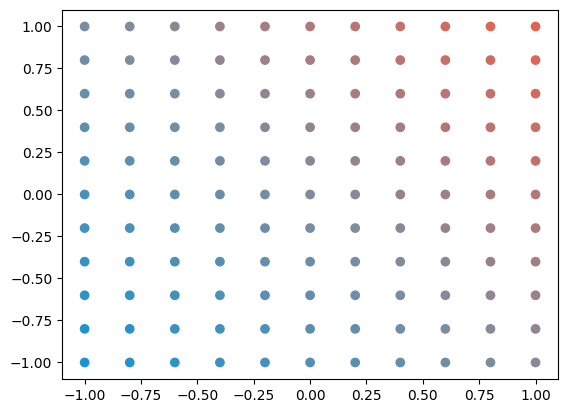

In [611]:
plt.scatter(test[:, 0], test[:, 1], c=run(test)[0].squeeze(), cmap=cmap)

Chain rule for backprop:
dL/dW1 = dL/dx2 * dx2/dW1 = dL/dx2 * x1
dL/dx1 = dL/dx2 * dx2/dx1
dL/dW0 = dL/dx1 * dx1/dW0 = dL/dx1 * x

In [612]:
# For each sample (the rows), in which direction does x2 need to be nudged
dLdX2 = -np.sign(expected - x2)
dLdX2

array([[-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-0.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.]])

In [613]:
# For each sample, in which direction do each of the W1 weights need to be nudged
dLdW1PerSample = dLdX2 * x1
# Sum over samples to get overall update to W1
dLdW1 = dLdW1PerSample.sum(axis=0)
dLdW1

array([0.99118969, 1.68613873, 0.87405676])

In [614]:
dLdX1 = np.outer(dLdX2, W1)
dLdX1

array([[-0.90989834,  0.85337733, -0.82178139],
       [-0.90989834,  0.85337733, -0.82178139],
       [ 0.90989834, -0.85337733,  0.82178139],
       [ 0.90989834, -0.85337733,  0.82178139],
       [-0.        ,  0.        , -0.        ],
       [-0.90989834,  0.85337733, -0.82178139],
       [-0.90989834,  0.85337733, -0.82178139],
       [ 0.90989834, -0.85337733,  0.82178139],
       [ 0.90989834, -0.85337733,  0.82178139]])

In [615]:
f = lambda i, j: np.outer(i, j)
vecF = np.vectorize(f, signature='(m),(n)->(m,n)')

dLdW0PerSample = vecF(input, dLdX1)
dLdW0 = dLdW0PerSample.sum(axis=0)
dLdW0

array([[ 1.81979669, -1.70675467,  1.64356277],
       [-1.81979669,  1.70675467, -1.64356277]])

In [616]:
e = 1e-2
W0 -= e * dLdW0
W1 -= e * dLdW1.reshape(3, 1)

W0
W1

array([[ 0.90503266,  0.74306015,  0.56419666],
       [ 0.44583374, -0.13414431,  0.16003954]])

array([[ 0.89998645],
       [-0.87023872],
       [ 0.81304082]])